

# Project 1: Investigate medical appointments in Brazil 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

<li>‘ScheduledDay’ tells us on what day the patient set up their appointment.</li>
<li>‘Neighborhood’ indicates the location of the hospital.</li>
<li>‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.</li>
<li> it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.</li>


**Importation of the needed library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

**In this section the needed data used was loading to the working environment using pandas. Also, we checked for data type and investigate the basic trend present in the data. The missing value was check and the data do not have any missing data.**
### General Properties

In [2]:
#Data importation
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

In [3]:
#Checking the first five row
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#Checking for the missing value
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There is no missing value in the dataset. The next cell we check for the sumary of the data.

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The total count of the row is 110527. The minimum age is less that a year. There is a negative value in the age will should be removed from thr data set.

In [6]:
#Checking the properties of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
#Checking age distribution
df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

### Data Cleaning

In [8]:
#droping Age that are negative
df = df[~df['Age']<0]

In [9]:
#Functon to check the unique count of each column
def unique(data):
    for i in data.columns:
        print(i,'=',data[i].nunique())

In [10]:
unique(df)

PatientId = 62298
AppointmentID = 110526
Gender = 2
ScheduledDay = 103548
AppointmentDay = 27
Age = 103
Neighbourhood = 81
Scholarship = 2
Hipertension = 2
Diabetes = 2
Alcoholism = 2
Handcap = 5
SMS_received = 2
No-show = 2


It can be seen that the handicape column has four response which suppose to be two. The remaining may be due to wrong inputation which will be dropped before the exploration. 

In [11]:
df.Handcap.value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [12]:
#Subsetting the handica column to contain only zero and one
df = df[df['Handcap']<2]
df.Handcap.value_counts()

0    108285
1      2042
Name: Handcap, dtype: int64

In [13]:
#Dropping the variable that are not needed
df.drop(["PatientId","AppointmentID"], axis = 1, inplace = True)

In [14]:
#Strimming the AppointmentDay and ScheduledDay column to inlude only date not date and time
df['AppointmentDay'] = df['AppointmentDay'].str[:-10]
df['ScheduledDay'] = df['ScheduledDay'].str[:-10]


# Convert AppointmentDay and ScheduledDay column types to datetime 
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [15]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The AppointmentDay and ScheduledDay column should be observed, it can be seen that the column contain only date.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In this section, the factors that are importance to know if a patient will come for appointment.

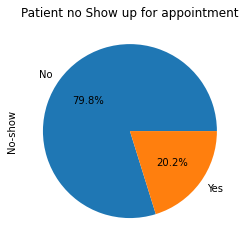

In [16]:
#Comparing te number of that show up and those that didn't show

bar=['No','Yes ']
df['No-show'].value_counts().plot(kind='pie', labels = bar,autopct='%1.1f%%')
#plt.xticks(range(2),bar, rotation = 0)
#plt.xlabel('Travel Insurance')
plt.title('Patient no Show up for appointment')
plt.show()

The pie chart shows that majority which is 79.8% of the patient show up for thier appointment. In th enext slide, We will compare the distribution of the patient based on the appointment show up.

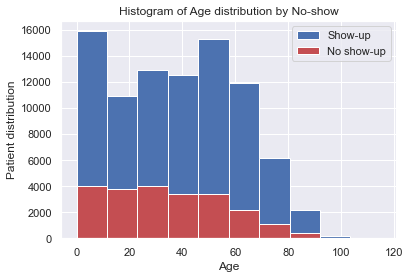

In [90]:
#Distribution of the patient based on the appointment show up
sns.set()
plt.hist(df[df['No-show']=='No'].Age, label = 'Show-up')
plt.hist(df[df['No-show']=='Yes'].Age, color = 'r', label = 'No show-up')
plt.title('Histogram of Age distribution by No-show')
plt.xlabel('Age')
plt.legend()
plt.ylabel('Patient distribution')
plt.show()

The histogram shows that patient between the age less than 15 years old show for appointment more compare to other, followed by patient between the age of 45 and 60. The patient that do not show up for appointment most are with the age range less than 35 years old. The age will be grouped in the next cell.


In [18]:
#width = 0.85
#plt.figure(figsize=(10,7))
#sns.catplot('AppointmentDay', data = df, kind = 'count')
#plt.xticks(rotation = 90)

#plt.show()

In [20]:
#This function was used to group the age column to different age group
def cate(i):
    age1=[]
    for age in df[i]:
        if age <= 20:
            age=1
            age1.append(age)
        elif 21<= age <= 40:
            age=2
            age1.append(age)
        elif 41<= age <= 60:
            age=3
            age1.append(age)
        elif 61<= age <= 80:
            age=4
            age1.append(age)
        else:
            age=5
            age1.append(age)
    return age1
    

In [21]:
#Adding new agr column
df['age_c'] = cate('Age')

In [22]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,age_c
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,3
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,4
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,1
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,3


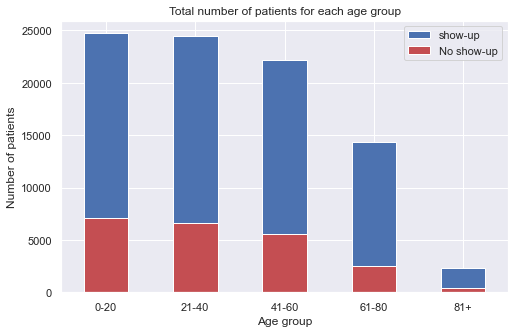

In [88]:
#Plot the age group base on patient show up for appointment

labels = ['0-20', '21-40', '41-60', '61-80', '81+']

sns.set()
width = 0.85
plt.figure(figsize=(8,5))
df[df['No-show']=='No'].age_c.value_counts().plot(kind='bar', label = 'show-up')
df[df['No-show']=='Yes'].age_c.value_counts().plot(kind='bar',color = 'r', label = 'No show-up')
plt.title('Total number of patients for each age group')
plt.xlabel('Age group')
plt.ylabel('Number of patients')
plt.legend()
plt.xticks(range(5),labels, rotation = 0)
plt.show()

The chart shows that the patient that show-up more for appointment are between the age of 0 to 40. To conclude on the , the best is to chech the proportion of each age group, which will be done next.

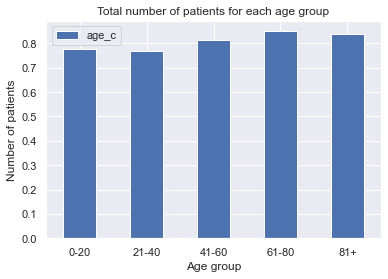

In [80]:
#Calculating propotion of patients that show up for appoinment among the age group
df[df['No-show']=='No'].age_c.value_counts()
df[df['No-show']=='Yes'].age_c.value_counts()

prop = pd.DataFrame(df[df['No-show']=='No'].age_c.value_counts()/(df[df['No-show']=='No'].age_c.value_counts() + df[df['No-show']=='Yes'].age_c.value_counts()))
prop.plot(kind="bar")
plt.title('Total number of patients for each age group')
plt.xlabel('Age group')
plt.ylabel('Number of patients')
plt.xticks(range(5),labels, rotation = 0)
plt.show()

Base on the proportion, the plot shows that patient that are more punctual for there appointmeant are of the age range of 61-80, followed by patient of 80 years and above. 

In [81]:
#Function to calculate the propotion of patient that show up for appoinment among the age group
label = ['False','True']
def propo(x,label):
    proportion = pd.DataFrame(df[df['No-show']=='No'][x].value_counts()/(df[df['No-show']=='No'][x].value_counts() + df[df['No-show']=='Yes'][x].value_counts()))
    
    plt.bar(proportion.index,proportion[x],width = 0.4)
    plt.title('Proportion of patients that show-up for appointment')
    plt.xlabel(x)
    plt.ylabel('Proportion of patients')
    plt.xticks(range(len(label)),label, rotation = 0)
    plt.show()


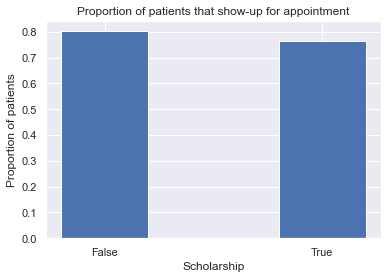

In [82]:
propo('Scholarship',label)

Also, the chart above shows the proportion of patient that show-up for appointment base on their scholarship status. It can be seen that patient with no scholarship show-up for there appointment compare to those patient with scholarship.

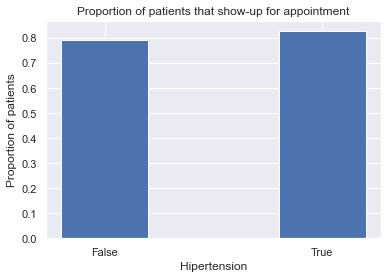

In [61]:
propo('Hipertension',label)

The chart above shows the proportion of patient that show-up for appointment base on their hypertension status. It can be seen that patient that have hypertention show-up for there appointment compare to those patient without hypertension.

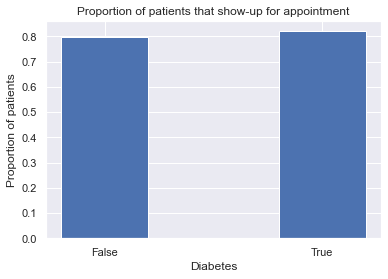

In [62]:
propo('Diabetes',label)

As expected, patient with diabetes show up for their appointment more than patient without diabetes.

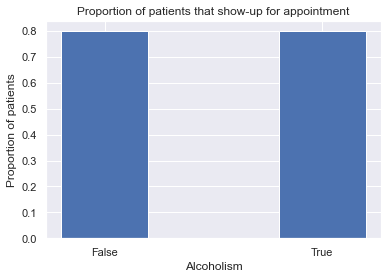

In [63]:
propo('Alcoholism',label)

The chart above shows that patient with alcoholism have almost the same chance of showing up for their appointment with patient without alcoholism.

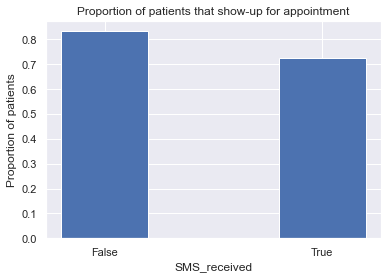

In [64]:
propo('SMS_received',label)

The chart above shows that patient that did not receive SMS have higher proportion of patients that show-up for there appointment compare to those that do not show up for their appointment

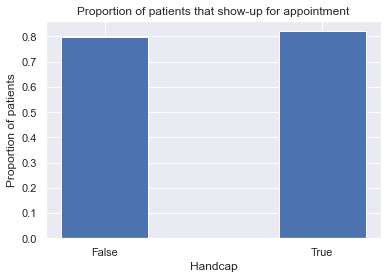

In [65]:
propo('Handcap',label)

It can be seen that patient that are handicap have higher perportion of patients that show-up for there appointment compare to those patient that are not handicap.

### Research Question 2 : What impact does days have on showing up for medical appointment?

In [67]:
#Extracting day of the week from the date column
df['day_of_week'] = df['AppointmentDay'].dt.day_name()

In [83]:
#Calculating the difference between AppointmentDay and ScheduledDay
df['Day_diff'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

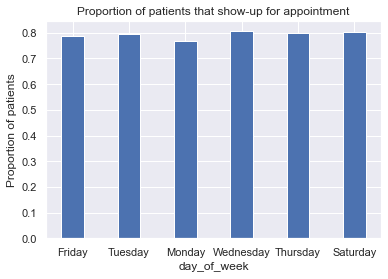

In [84]:
label = ['Friday', 'Tuesday','Monday','Wednesday', 'Thursday','Saturday']

propo('day_of_week',label)

The chart above shows that patient shows up for their appointment more on Tuesday, Wednesday, Thursday, and Saturday as comapre to other days. Monday has the least showing up rate.

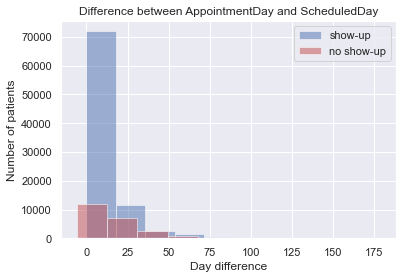

In [87]:
#Histogram for the difference between AppointmentDay and ScheduledDay
plt.hist(df[df['No-show']=='No'].Day_diff, alpha = 0.5, label = 'show-up')
plt.hist(df[df['No-show']=='Yes'].Day_diff, color = 'r', alpha = 0.5, label = 'no show-up')
plt.title('Difference between AppointmentDay and ScheduledDay')
plt.xlabel('Day difference')
plt.ylabel("Number of patients")
plt.legend()
plt.show()

The difference between appointment day and scheduled day histogram shows the time difference distribution, it can be seen that patient that the difference between their appointment day and schedule day is between 0 and 20days show up more for the appointments.

<a id='conclusions'></a>
## Conclusions

> **>** The project investigate medical appointments in Brazil. The investigation was based on the factors that influence patients showing up for their appointments.

> **1**: It was observed that majority i.e 79.8% of the patients show up for their appointments. Also, it was observed that patients who are 40 years and above show up for their appointments compare to those patients with lesser age. This can be said that patients of age less than forty years except children are busier and due miss appointments.

> **2**: Furthermore, patients without scholarship and patients that did not receive SMS tend to show up for their appointments compare to patients with scholarship and patients that received SMS.

> **3**: Patient with illness like hypertension, diabetes and patients that are handicaps have higher proportion of patients that shows up for thier appointment. It was obsereved  that saturday been the weekend and wednesday been the mid-week, patients that have appointments on those two days have higher proportion of showing up for their appointments. Monday been a working day have the lowest proportion of patients that show up for their appointments. Finally, the number of days between theaAppointment day and scheduled day is very important bacause patient with difference above 20 days tend to miss the appointment.


In [91]:
pip install pandoc

  Created wheel for pandoc: filename=pandoc-2.2-py3-none-any.whl size=29557 sha256=aaddd805cf3cc6e81e203d47038f0fe969e93a171a179efa610f045a2ef871e4
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\2d\da\b1\54ff0401ef9b07b60c7fc9cffe616f243cf27dc3d04bd5d5ef
Successfully built pandoc
Note: you may need to restart the kernel to use updated packages.
